# Import Required Libraries
Import necessary libraries like numpy for random number generation, matplotlib for visualization, and math for pi.

In [12]:
import numpy as np  # For random number generation and numerical operations
import matplotlib.pyplot as plt  # For visualization
import math  # For mathematical constants like pi

# Define the Problem
Set up the problem statement and define the unit circle with radius 1, centered at the origin. Explain the relationship between the area of a unit circle (π) and the square (4) that contains it.

In [13]:
# Define the problem statement and relationship between the unit circle and the square
# The unit circle has a radius of 1 and is centered at the origin (0, 0)
# The square that contains the circle has side length 2 (from -1 to 1 on both x and y axes)
# The area of the square is 4, and the area of the circle is π (approximately 3.14159)

# Define the radius of the unit circle
radius = 1

# Define the area of the square that contains the circle
square_area = (2 * radius) ** 2  # Side length squared

# Define the theoretical area of the unit circle
circle_area_theoretical = math.pi  # Using the value of π from the math module

# Print the problem setup
print(f"Radius of the unit circle: {radius}")
print(f"Area of the square containing the circle: {square_area}")
print(f"Theoretical area of the unit circle: {circle_area_theoretical:.5f}")

Radius of the unit circle: 1
Area of the square containing the circle: 4
Theoretical area of the unit circle: 3.14159


# Generate Random Points
Create a function to generate random points (x,y) within the unit square [0,1] × [0,1]. Generate a specified number of random points using numpy's random functions.

In [14]:
import numpy as np  # For random number generation

def generate_random_points(num_points):
    """
    Generate random points (x, y) within the unit square [0, 1] × [0, 1].

    Parameters:
        num_points (int): The number of random points to generate.

    Returns:
        tuple: Two numpy arrays containing the x and y coordinates of the points.
    """
    x_points = np.random.uniform(-1, 1, num_points)  # Generate random x-coordinates
    y_points = np.random.uniform(-1, 1, num_points)  # Generate random y-coordinates
    return x_points, y_points

# Example usage
num_points = 1000  # Specify the number of random points to generate
x_points, y_points = generate_random_points(num_points)  # Generate the points

# Print the first 5 points for verification
print(f"First 5 x-coordinates: {x_points[:5]}")
print(f"First 5 y-coordinates: {y_points[:5]}")

First 5 x-coordinates: [ 0.56649956 -0.54508431  0.16702525  0.77178828  0.29131792]
First 5 y-coordinates: [-0.40748921 -0.22968635  0.69799256  0.91449999  0.55373832]


# Check if Points are Inside the Circle
Create a function that determines whether points are inside the circle by checking if x² + y² ≤ 1. Separate points into 'inside' and 'outside' categories.

In [15]:
def check_points_inside_circle(x_points, y_points, radius=1):
    """
    Check if points are inside the unit circle and separate them into 'inside' and 'outside' categories.

    Parameters:
        x_points (numpy array): Array of x-coordinates of the points.
        y_points (numpy array): Array of y-coordinates of the points.
        radius (float): Radius of the circle (default is 1).

    Returns:
        tuple: Four lists containing x and y coordinates of points inside and outside the circle.
    """
    x_inside = []  # List to store x-coordinates of points inside the circle
    y_inside = []  # List to store y-coordinates of points inside the circle
    x_outside = []  # List to store x-coordinates of points outside the circle
    y_outside = []  # List to store y-coordinates of points outside the circle

    for x, y in zip(x_points, y_points):
        if x**2 + y**2 <= radius**2:  # Check if the point is inside the circle
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    return x_inside, y_inside, x_outside, y_outside

# Example usage
x_inside, y_inside, x_outside, y_outside = check_points_inside_circle(x_points, y_points)

# Print the number of points inside and outside the circle for verification
print(f"Number of points inside the circle: {len(x_inside)}")
print(f"Number of points outside the circle: {len(x_outside)}")

Number of points inside the circle: 808
Number of points outside the circle: 192


# Calculate Estimated Area
Calculate the ratio of points inside the circle to total points, and multiply by 4 (area of the square) to get the estimated area of the circle. Compare with the actual value of π.

In [16]:
# Calculate the ratio of points inside the circle to total points
num_points_inside = len(x_inside)  # Number of points inside the circle
num_points_total = len(x_points)  # Total number of points generated

# Estimate the area of the circle
circle_area_estimated = (num_points_inside / num_points_total) * square_area

# Compare the estimated area with the theoretical area
print(f"Estimated area of the unit circle: {circle_area_estimated:.5f}")
print(f"Theoretical area of the unit circle: {circle_area_theoretical:.5f}")
print(f"Difference between estimated and theoretical area: {abs(circle_area_estimated - circle_area_theoretical):.5f}")

Estimated area of the unit circle: 3.23200
Theoretical area of the unit circle: 3.14159
Difference between estimated and theoretical area: 0.09041


# Visualize the Simulation
Create a visualization showing points inside and outside the circle with different colors. Plot the unit circle for reference. Use matplotlib to create a scatter plot with the inside/outside points arrays.

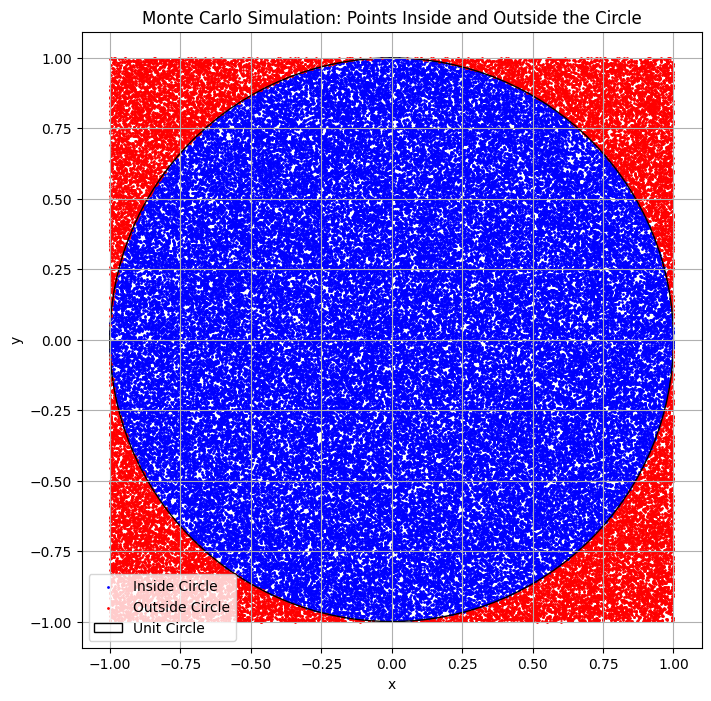

In [19]:
import matplotlib.pyplot as plt  # For visualization

# Visualize the simulation
def visualize_simulation(x_inside, y_inside, x_outside, y_outside):
    """
    Visualize the Monte Carlo simulation by plotting points inside and outside the circle.

    Parameters:
        x_inside (list): x-coordinates of points inside the circle.
        y_inside (list): y-coordinates of points inside the circle.
        x_outside (list): x-coordinates of points outside the circle.
        y_outside (list): y-coordinates of points outside the circle.
    """
    plt.figure(figsize=(8, 8))  # Set the figure size

    # Plot points inside the circle in blue
    plt.scatter(x_inside, y_inside, color='blue', s=1, label='Inside Circle')

    # Plot points outside the circle in red
    plt.scatter(x_outside, y_outside, color='red', s=1, label='Outside Circle')

    # Plot the unit circle for reference
    circle = plt.Circle((0, 0), radius, color='black', fill=False, label='Unit Circle')
    plt.gca().add_artist(circle)

    # Set plot limits and labels
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Monte Carlo Simulation: Points Inside and Outside the Circle')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Ensure equal scaling for x and y axes
    plt.show()

# Call the visualization function
visualize_simulation(x_inside, y_inside, x_outside, y_outside)

# Analyze Accuracy with Different Sample Sizes
Run the simulation with increasing numbers of points (e.g., 100, 1000, 10000, 100000) and compare how the accuracy of the π estimation improves. Create a plot showing error vs. sample size.

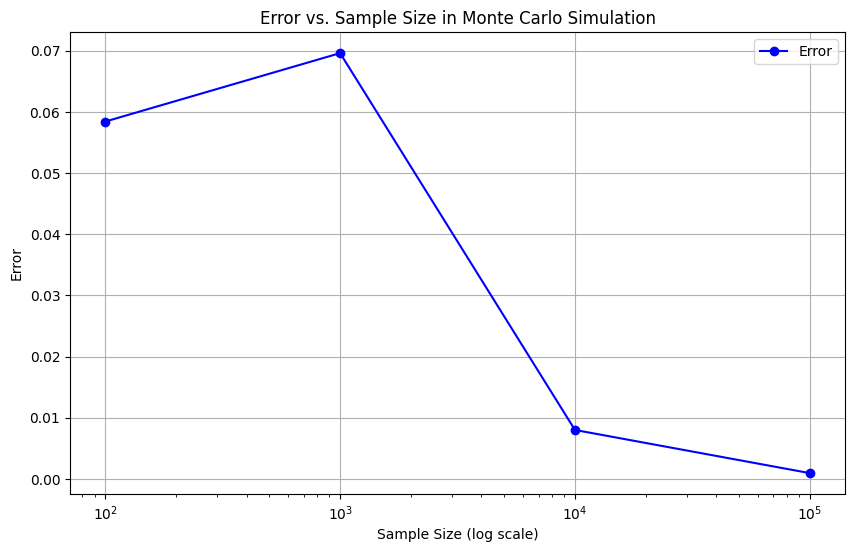

In [18]:
# Analyze Accuracy with Different Sample Sizes

# Define sample sizes to test
sample_sizes = [100, 1000, 10000, 100000]

# Initialize lists to store results
errors = []

# Loop through each sample size
for num_points in sample_sizes:
    # Generate random points
    x_points, y_points = generate_random_points(num_points)
    
    # Check points inside the circle
    x_inside, y_inside, x_outside, y_outside = check_points_inside_circle(x_points, y_points)
    
    # Calculate the estimated area of the circle
    num_points_inside = len(x_inside)
    circle_area_estimated = (num_points_inside / num_points) * square_area
    
    # Calculate the error (absolute difference from theoretical area)
    error = abs(circle_area_estimated - circle_area_theoretical)
    errors.append(error)

# Plot error vs. sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, errors, marker='o', linestyle='-', color='blue', label='Error')
plt.xscale('log')  # Use logarithmic scale for sample size
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Error')
plt.title('Error vs. Sample Size in Monte Carlo Simulation')
plt.grid(True)
plt.legend()
plt.show()